# **Implementación de las hipotesis**

Informe final **Grupo 9**

Jan Polanco\
Keyner Martínez\
Jorge Mora\
Juan Paz

## Conjunto de Datos de Yelp

Pendiente por agregar mas informacion.

### Contenido del Dataset
- **review_id:**
- **user_id:**
- **business_id:**
- **stars:**
- **useful:**
- **funny:**
- **cool:**
- **text:**
- **date:**

Para acceder a la versión más reciente del conjunto de datos proporcionada por IBM, visite el siguiente enlace: [Yelp Dataset](https://javerianacaliedu-my.sharepoint.com/:f:/g/personal/abuss_javerianacali_edu_co/EqgSYnRKWYNEmAwYE7-_-TYBISFAsGx31Etz73geJ1fXxA?e=vQJNLk ).

# Rubrica de evaluación

| Criterios                     | Nivel 1 | Nivel 2 | Nivel 3 | Nivel 4 | Puntuación del criterio |
|-------------------------------|---------|---------|---------|---------|------------------------|
| Preparación de datos          | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Procesamiento de datos numéricos | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Procesamiento de datos textuales | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Estimación del número de clusters a generar | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5          |
| Construcción del modelo       | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Evaluación de los resultados  | 0 puntos| 0.4 puntos| 0.8 puntos| 1.25 puntos| /1.25                |
| Análisis de los resultados    | 0 puntos| 0.4 puntos| 0.8 puntos| 1.25 puntos| /1.25                |


## Etapa 1: Entedimientos de los datos

In [3]:
import re
import tiktoken
#import time
#import itertools
#import numpy as np
import pandas as pd
import pathlib as pl
#from tqdm import tqdm
import seaborn as sns

#from sklearn.svm import SVC
#from scipy import stats
#import plotly.express as px
#from sklearn.utils import resample
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.feature_extraction.text import CountVectorizer


import string
import nltk
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer



#from matplotlib.patheffects import withStroke
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder as LE
#from sklearn.preprocessing import StandardScaler
#from yellowbrick.classifier import ClassificationReport
#from yellowbrick.classifier import ConfusionMatrix
#from yellowbrick.classifier import ROCAUC
#from sklearn.metrics import classification_report
#from sklearn.model_selection import GridSearchCV # Grid search cross validation
#from sklearn.model_selection import RandomizedSearchCV # Random search cross validation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
current_path    = pl.Path.cwd()
new_folder      = current_path.joinpath('img').mkdir(exist_ok=True)
img_path        = current_path.joinpath('img')

In [8]:
local = True

if local:
    df = pd.read_parquet(current_path.joinpath('dataset', 'yelp_academic_dataset_review_FL.parquet'))
else:
    !git clone https://github.com/hamsomp3/trabajo-final.git
    %cd trabajo-final/dataset
    df = pd.read_parquet('/content/trabajo-final/dataset/yelp_academic_dataset_review_FL.parquet')

df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,2.5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06
1,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,4.5,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06
2,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,4.0,2,0,1,I go to blow bar to get my brows done by natal...,2016-03-07 00:02:18
3,mO398Ed5dpv1H5ZsKc8KXw,yobeeTUBfaTBcnk26mXNuA,hKameFsaXh9g8WQbv593UA,3.5,0,0,0,Food was good- atmosphere/decor is like a fish...,2015-04-15 15:30:48
4,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,4.0,1,0,0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12


# Descripción de Variables en Reseñas

Cada reseña en el sistema contiene varias variables que proporcionan información detallada sobre la opinión del usuario y el negocio revisado. A continuación, se detalla cada variable y su significado:

## Variables

### `review_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para cada reseña.

### `user_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para el usuario que escribe la reseña. Se vincula con el usuario en `user.json`.

### `business_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para el negocio revisado. Se vincula con el negocio en `business.json`.

### `stars`
- **Tipo**: `integer`
- **Descripción**: Calificación en estrellas otorgada por el usuario al negocio. Varía de 1 a 5.

### `date`
- **Tipo**: `string` (formato `YYYY-MM-DD`)
- **Descripción**: Fecha en que se realizó la reseña.

### `text`
- **Tipo**: `string`
- **Descripción**: Texto de la reseña escrita por el usuario.

### `useful`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue útil.

### `funny`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue divertida.

### `cool`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue interesante o "cool".


In [10]:
df.dtypes

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [11]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [12]:
print('El dataset tiene {} filas y {} columnas.'.format(df.shape[0], df.shape[1]))
print("El número de registros es: ", df.shape[0])
print("El número de atributos es: ", df.shape[1])

El dataset tiene 1161545 filas y 9 columnas.
El número de registros es:  1161545
El número de atributos es:  9


In [13]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Variables Numéricas

In [14]:
df.describe().round(3)

,stars,useful,funny,cool
count,1161545.000,1161545.000,1161545.000,1161545.000
mean,3.767,1.109,0.285,0.494
std,0.762,3.207,1.510,2.496
min,1.000,-1.000,-1.000,-1.000
25%,3.500,0.000,0.000,0.000
50%,4.000,0.000,0.000,0.000
75%,4.500,1.000,0.000,0.000
max,5.000,227.000,159.000,207.000


In [15]:
df.loc[df['useful'].idxmax()]

review_id                                 ehUVIpfylhrxraozNY_TDQ
user_id                                   JjXuiru1_ONzDkYVrHN0aw
business_id                               SNxUXrSr-XkEkSQIdjmjhA
stars                                                        3.5
useful                                                       227
funny                                                        159
cool                                                         207
text           I've been coming to Hank's Catfish & BBQ for m...
date                                         2018-12-10 18:16:28
Name: 778031, dtype: object

1. **Conteo (count)**: Esta fila muestra el número total de valores no nulos en cada columna. En este caso, cada columna tiene 1,161,545 entradas, lo que significa que no hay valores nulos en ninguna de las columnas y que el dataset es bastante grande.
2. **Media (mean)**: La fila de la media calcula el valor promedio de cada columna. Las puntuaciones promedio (`stars`) son de 3.767, lo que sugiere una tendencia hacia reseñas positivas, ya que es más cercano a 5 que a 1. Los valores medios de `useful`, `funny` y `cool` son bastante bajos (1.109, 0.285 y 0.494 respectivamente), indicando que, en promedio, las reseñas reciben pocos votos que se marcan a menudo como útiles, divertidas o cool.
3. **Desviación estándar (std)**: Esta fila muestra la variabilidad o dispersión de los datos. Para `stars`, una desviación estándar de 0.762 indica que la mayoría de las puntuaciones están dentro de un rango relativamente estrecho alrededor del promedio. Las desviaciones estándar de `useful`, `funny` y `cool` sugieren una leve variabilidad en cómo los usuarios votan las reseñas con estas etiquetas.
4. **Mínimo (min)**: El mínimo es el valor más bajo en cada columna. Interesantemente, las columnas `useful`, `funny` y `cool` tienen valores mínimos negativos (-1), lo que podría ser un error ya que no se esperarían votos negativos en estas categorías.
5. **Percentiles (25%, 50%, 75%)**: Estos valores describen la distribución de los datos.
   - El percentil 25% indica que el 25% de las puntuaciones son de 3.5 o inferiores para las `stars`.
   - El percentil 50%, o mediana, muestra que la mitad de las puntuaciones son de 4.0 o inferiores para las `stars`.
   - El percentil 75% indica que el 75% de las puntuaciones son de 4.5 o inferiores para las `stars`.
6. **Máximo (max)**: El valor más alto en cada columna. En `stars`, el máximo es 5, que es la puntuación más alta posible. Para `useful`, `funny` y `cool`, la cantidad máxima de votos son 227, 159 y 207 respectivamente. Por ejemplo el caso del `JjXuiru1_ONzDkYVrHN0aw` escribió el `ehUVIpfylhrxraozNY_TDQ` sobre el negocio `SNxUXrSr-XkEkSQIdjmjhA` y obtuvo 227 votos considerando la reseña como útil.

In [16]:
numerical_features = df.select_dtypes(include=['number']).columns
print(numerical_features)

Index(['stars', 'useful', 'funny', 'cool'], dtype='object')


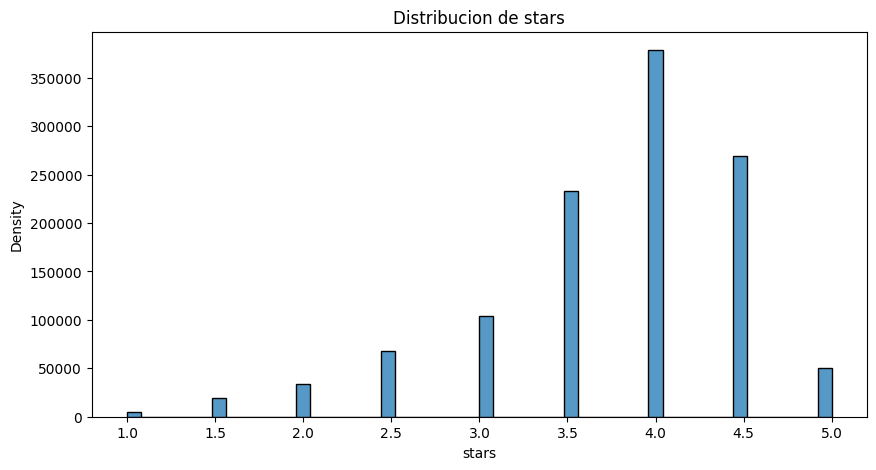

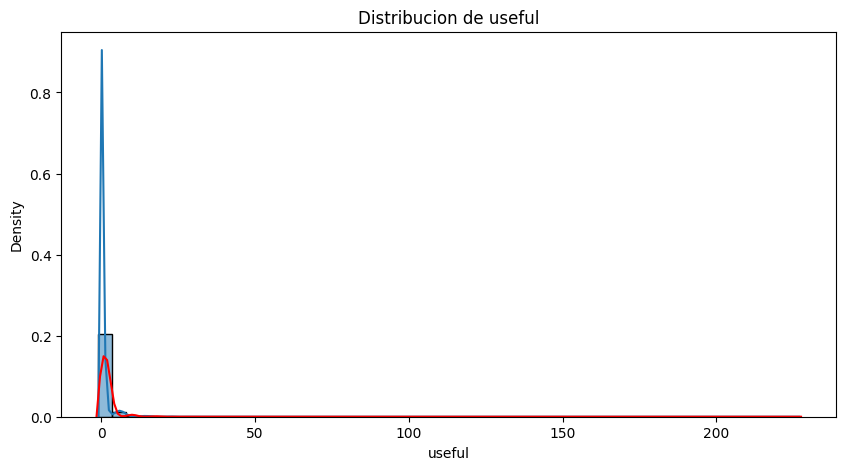

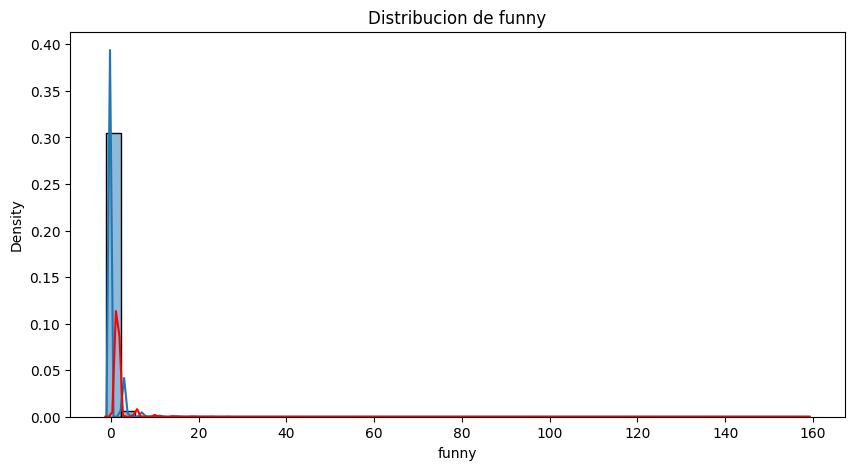

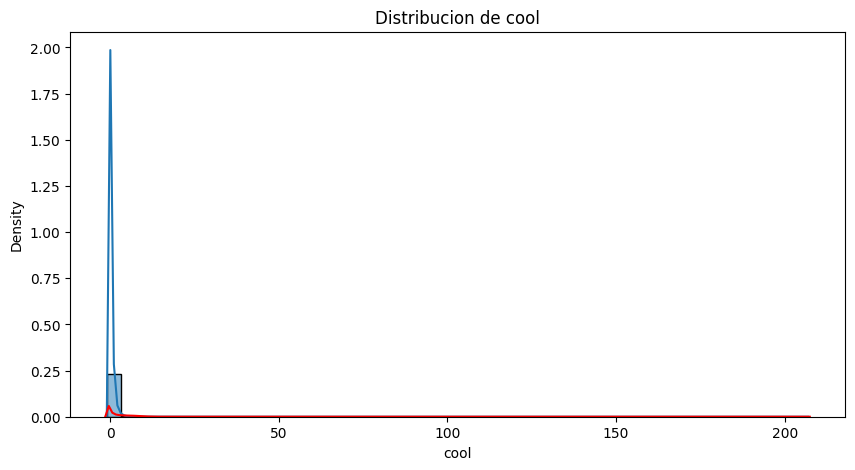

In [17]:
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribucion de {col}')
    if col == 'stars':
        sns.histplot(df[col], bins=50, kde=False)
    else:
        sns.histplot(df[col], bins=50, kde=True, stat='density')
        sns.kdeplot(df[col], color='red')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.savefig(img_path.joinpath(f'density_{col}_plot.png'))
    plt.show()

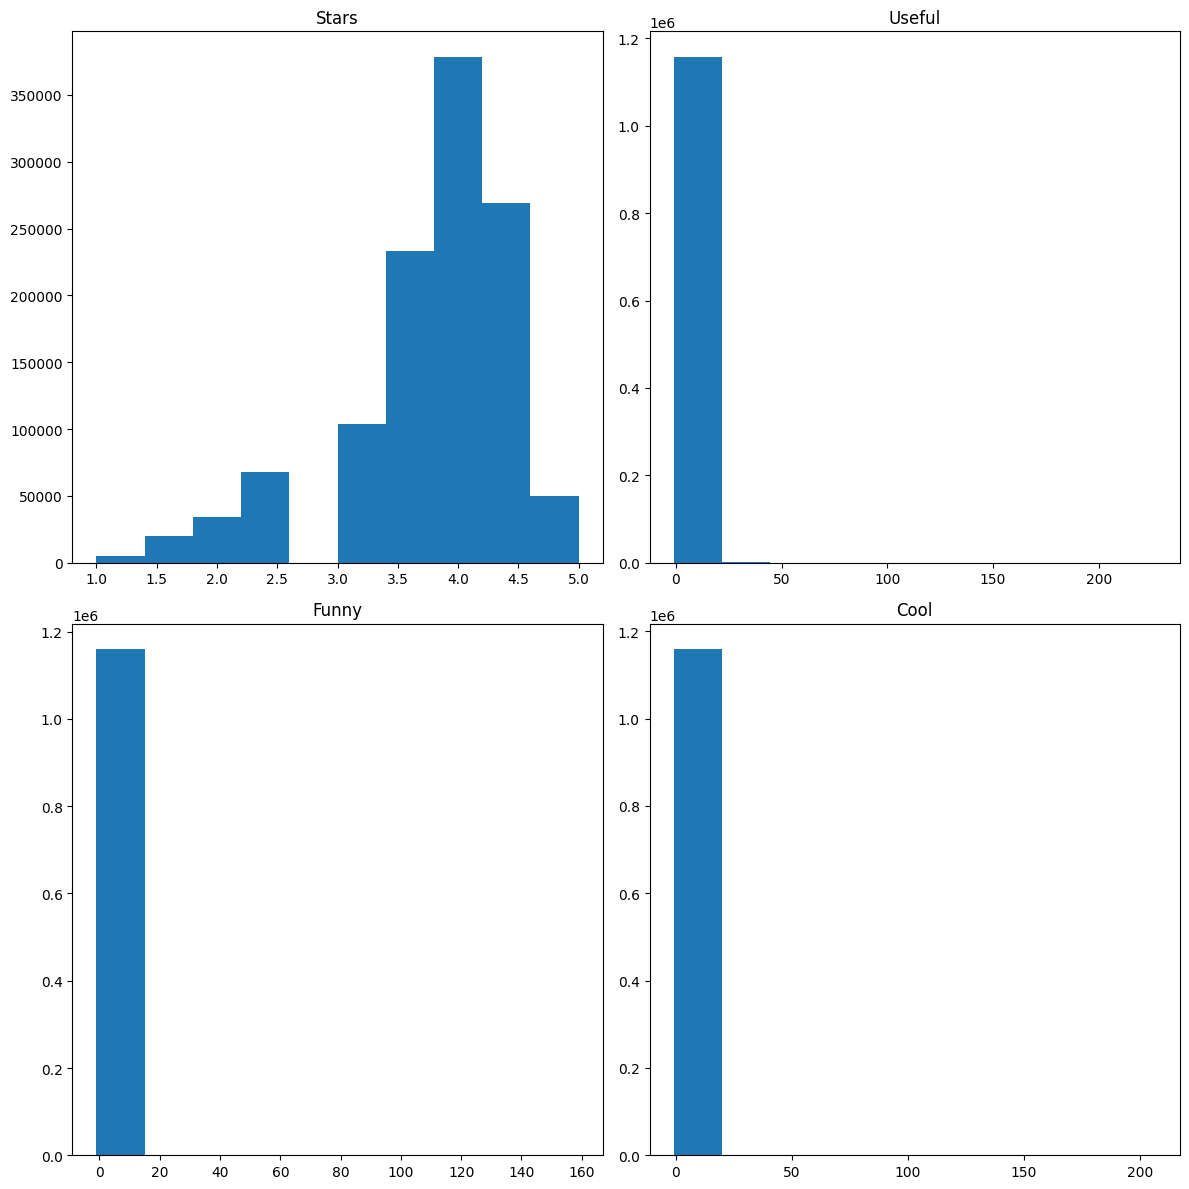

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), squeeze=False)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature])
    axes[i].set_title(feature.capitalize())

fig.tight_layout()
plt.savefig(img_path.joinpath('numerical_features_plot.png'))
plt.show()

# Procesamiento de datos textuales

agregar una breve descripcion de como se realizo el procesamiento de los datos textuales.

## Conteo promedio de letras

In [20]:
def count_chars(text):
    words = len(text) 
    return words

df['num_chars'] = df['text'].apply(count_chars)

In [21]:
df['num_chars'].describe().round(2)

count    1161545.00
mean         533.71
std          505.79
min            1.00
25%          213.00
50%          375.00
75%          672.00
max         5000.00
Name: num_chars, dtype: float64

In [22]:
num_chars_max = df.loc[df['num_chars'].idxmax()]
num_chars_min = df.loc[df['num_chars'].idxmin()]

In [23]:
num_chars_min

review_id      5Z6om3XyVC8uD6u4gBDWSg
user_id        3ZYBMnT8-1_jeFqe4SIXjA
business_id    l3KAtCq9JPEpzU_vyxqokw
stars                             4.5
useful                              0
funny                               0
cool                                0
text                                .
date              2016-11-28 16:49:15
num_chars                           1
Name: 244657, dtype: object

In [24]:
num_chars_max

review_id                                 RAZGlxpXchQgosgcNEPfwQ
user_id                                   sFZkNjFkg6723Z8nqxUUdw
business_id                               mO0NXx8gr5wX4yQRQC4wRQ
stars                                                        4.0
useful                                                         2
funny                                                          6
cool                                                           1
text           It's Surreal...\nLet me start by saying this r...
date                                         2012-07-23 18:30:54
num_chars                                                   5000
Name: 19028, dtype: object

## Conteo promedio de palabras por reseña

In [25]:
def count_words(text):
  words = text.split()
  return len(words)

df['num_words'] = df['text'].apply(count_words)

In [26]:
df['num_words'].describe().round(2)

count    1161545.00
mean          98.72
std           94.36
min            1.00
25%           39.00
50%           69.00
75%          125.00
max         1040.00
Name: num_words, dtype: float64

In [27]:
num_words_min = df.loc[df['num_words'].idxmin()]
num_words_max = df.loc[df['num_words'].idxmax()]

In [28]:
num_words_min

review_id      3RBzkqUMmVeM-4mSN8RtoA
user_id        179pYEFQ7LXZvphKoMdzBA
business_id    gJ9YeSqAMMF0M0-y58j0Gg
stars                             3.0
useful                              0
funny                               0
cool                                0
text                             Booo
date              2014-08-19 20:05:44
num_chars                           4
num_words                           1
Name: 50511, dtype: object

In [29]:
num_words_max

review_id                                 HJDckSCdY6qjBVeU1mqxrg
user_id                                   dkzNmbTAd1bFBylPokEw2Q
business_id                               mfQA7AU6WHn5NzgBfUq0Rw
stars                                                        2.0
useful                                                         0
funny                                                          0
cool                                                           0
text           kendra your entire comment to my post is a 100...
date                                         2019-04-04 11:12:27
num_chars                                                   4952
num_words                                                   1040
Name: 614403, dtype: object

## Conteo promedio de palabras por token

In [30]:
text = df.text.to_list()
print(text[0])

My experience with Shalimar was nothing but wonderful. 
I wanted to get my engagement ring sized and was told over the phone that it could probably be done within the day. 
When I brought it by, the team confirmed that the jeweler would be able to accommodate my same-day request and that it would be around $40 (simple band, decrease by three full sizes).
I checked my size one more time, confirmed, and left to let them do their thing.
When I came to pick up later that afternoon, the ring was too small. It's very important to note that Shalimar sized the ring perfectly, but that I made a mistake and should've gone up a half-size.
The Shalimar group were completely understanding and accommodating, even resizing my ring back up and getting it back to me within an hour at no charge! Even though it was my mistake!
The associates' attitudes in dealing with what was a pretty embarrassing situation instantly earned my satisfaction and loyalty as a customer. Very grateful for such a wonderful ex

In [31]:
encoding = tiktoken.get_encoding("cl100k_base")

def count_tokens_gpt4(text):
    num_tokens = len(encoding.encode(text))
    return num_tokens

df['num_tokens-gpt4'] = df['text'].apply(count_tokens_gpt4)

In [32]:
df['num_tokens-gpt4'].describe().round(2)

count    1161545.00
mean         120.54
std          114.88
min            1.00
25%           48.00
50%           84.00
75%          152.00
max         1381.00
Name: num_tokens-gpt4, dtype: float64

In [33]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4
0,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,2.5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,1009,177,210
1,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,4.5,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06,175,29,37
2,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,4.0,2,0,1,I go to blow bar to get my brows done by natal...,2016-03-07 00:02:18,393,78,92
3,mO398Ed5dpv1H5ZsKc8KXw,yobeeTUBfaTBcnk26mXNuA,hKameFsaXh9g8WQbv593UA,3.5,0,0,0,Food was good- atmosphere/decor is like a fish...,2015-04-15 15:30:48,222,40,54
4,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,4.0,1,0,0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12,1016,189,252


In [34]:
stop_words = set(stopwords.words('english'))
def count_tokens(text):
    token = WordPunctTokenizer().tokenize(text)
    clean_token=[]
    for tok in token:
        tok = tok.lower()
        new_token = re.sub(r'[^a-zA-Z]+', '', tok) 
        if new_token != "" and len(new_token) >= 2: 
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0:
                clean_token.append(new_token)
    return len(clean_token)

df['num_tokens'] = df['text'].apply(count_tokens)

In [35]:
df['num_tokens'].describe().round(2)

count    1161545.00
mean          91.12
std           86.69
min            0.00
25%           36.00
50%           64.00
75%          115.00
max          962.00
Name: num_tokens, dtype: float64

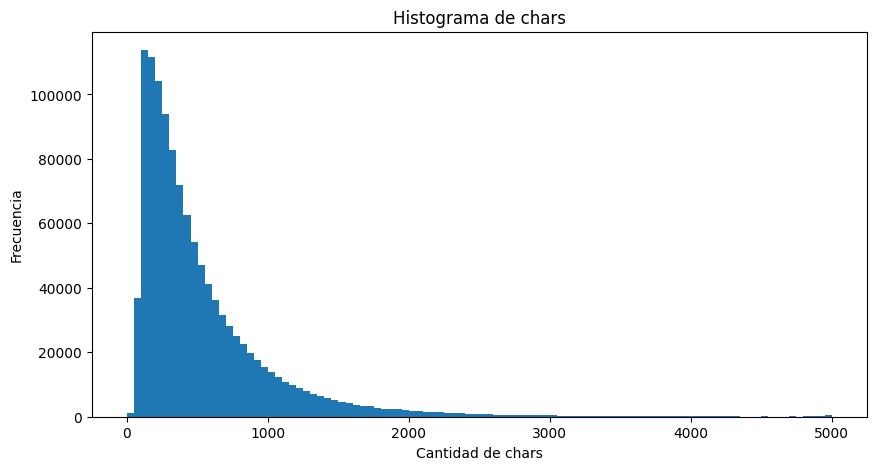

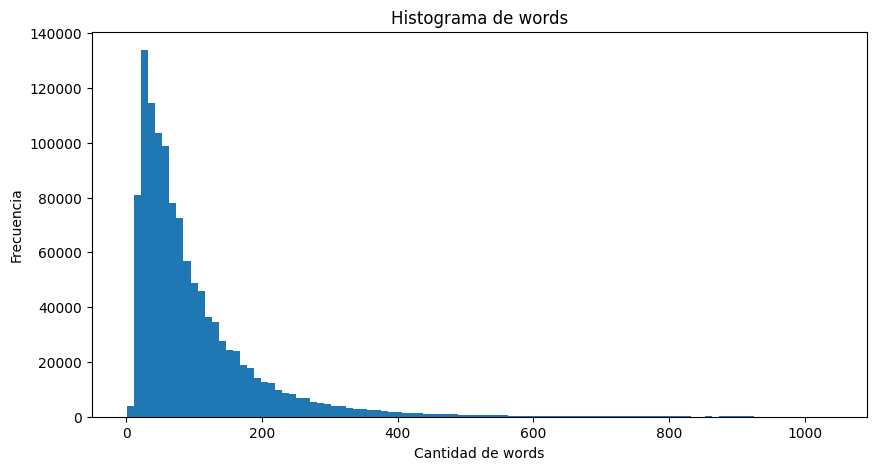

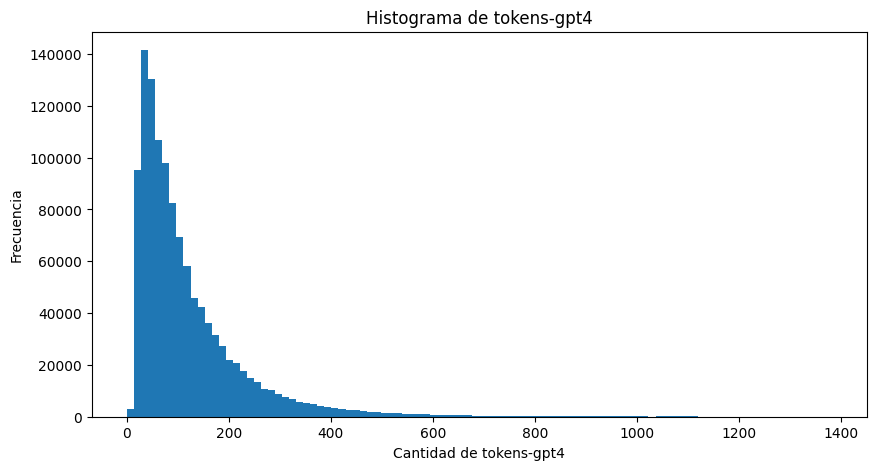

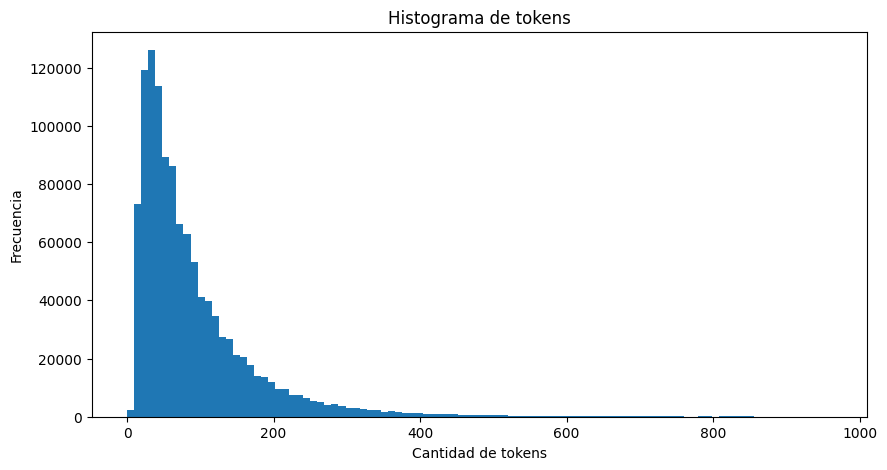

In [39]:
for col in df.columns[9:]:
    name = col.split('_')[1]
    plt.figure(figsize=(10, 5))
    plt.hist(df[col], bins=100)
    plt.title(f'Histograma de {name}')
    plt.xlabel(f'Cantidad de {name}')
    plt.ylabel('Frecuencia')
    plt.savefig(img_path.joinpath(f'hist_{name}_plot.png'))
    plt.show()

## cuando empezo YELP a funcionar? este dato es de wikipedia

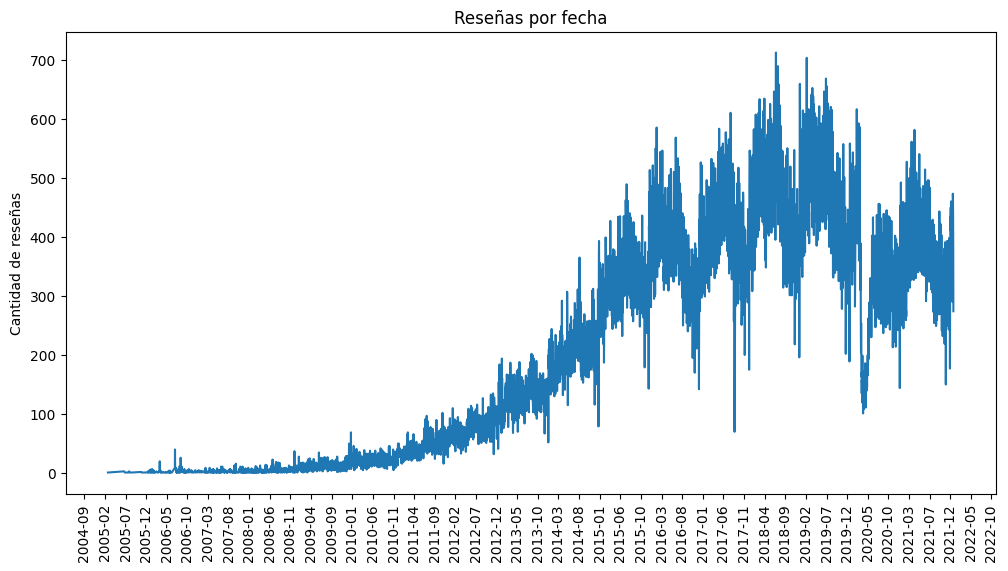

In [40]:
df['date'] = pd.to_datetime(df['date'])

grouped = df.groupby(df['date'].dt.date).count()['review_id']

plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=150))

plt.title("Reseñas por fecha")
plt.ylabel("Cantidad de reseñas")
plt.xticks(rotation=90)
plt.savefig(img_path.joinpath('reviews_by_date_plot.png'))
plt.show()

## Bag of words

In [53]:
corpus = df['text'].to_list()
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(corpus)

In [62]:
stop_words = set(stopwords.words('english'))
list=vectorizer.get_feature_names_out()
list = list.tolist()

In [60]:
print(f"Antes de eliminar stopwords: {len(list)}")
list = [i for i in list if not i in stop_words]
print(f"Después de eliminar stopwords: {len(list)}")
clean_corpus=[]
for tok in list:
    # 1. se convierten todos los caracteres alfabéticos a minúsculas
    tok = tok.lower()
    # 2. se elimia cualquier caracter que no sea alfabético (números, puntuaciones, etc)
    new_list = re.sub(r'[^a-zA-Z]+', '', tok) 
    # 3. Finalmente, se eliminan aquellos lists que correspondan a espacios.
    if new_list != "" and len(new_list) >= 2: 
        vowels=len([v for v in new_list if v in "aeiou"])
        if vowels != 0: # se remueven aquellos lists que no contienen vocales
            clean_corpus.append(new_list)
print(f"Después de eliminar palabras con RegEx: {len(clean_corpus)}")


Antes de eliminar stopwords: 208944
Después de eliminar stopwords: 208917
Después de eliminar palabras con RegEx: 196043


In [61]:
print("El tamaño del vocabulario es: ", len(clean_corpus))
print("Las primeras 10 palabras del vocabulario son: ", clean_corpus[:10])

El tamaño del vocabulario es:  196043
Las primeras 10 palabras del vocabulario son:  ['mi', 'mile', 'am', 'an', 'and', 'ea', 'for', 'he', 'hour', 'ish']


In [ ]:
punc = string.punctuation
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punc])
    text = [lem.lemmatize(w) for w in text.split() if w not in stop_words]
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
clean_text= df.clean_text.to_list()

print(clean_text[4])

# pENDIENTE


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

df['cluster'] = kmeans.labels_